<a href="https://colab.research.google.com/github/Ishaa-ux/Master/blob/main/Mental_Health_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MENTAL HEALTH SURVEY ANALYSIS:**

Project type- EDA using python
Contribution- Individual

# **Project summary**

The project Mental Health trend in the Workplace is a growing global concern paticularly in high pressure and fast evolving industries like tech. Despite increasing awareness there remains a significant variation in how mental health issues are perceived or addressed across different geographic regions and organizations. This project i have analyzed that over 1,250 professionals from various countries to understand the frequency of mental health issues and attidtudes towards mental health in the workplace and the key predictors that influence whether individuals seek treatment or supported in their work environments.
The key objectives were to explore the frequency of mental health including comfort levels in discussing issues availability of support and perceived consequences.And to identify the strongest predictors of whether indidvuals seek treatment or report a history of mental health challenges.Also to visualize trends and relationships in the data to support data driven policy recommendation.
The dataset gathered through an online survey, first thing was to do is data cleaning like removing outliers on age column, normalizing gender values and handling missing values using libraries like pandas matplotlib and seaborn.
Counties such as US, UK and Canada showed the highest rates of mental health treatment among respondents. Several countries with fewer responses or limited mental health infrastructure had noticeably lower treatment rates indicating potential stigma or lack of access. Respondents whose employers provided mental health benefits wellness programs or access to care options were significantly more likely to seek treatment. Larger companies reported a greater level of comfort discussing mental health in job interviews compared to smaller companies.

## **Github link**

# **Problem Statement**

1)Do certain countries report higher or lower treatment rates for mental health issues?
2) How does geographic location workplace culture and personal history affect the frequency of mental health illness?
3) What are the attitudes towards seeking treatment or discussing mental health in th workplace?
4)What are the strongest predictors that influence whether employees feel supported when dealing with mental health issues at work?

# **Conclusion**

The project highlighted the role that culture, geography, and organizational policy play in shaping mental health outcomes in the workplace. While individual factors such as age or gender had some influence, access to benefits, company size, and family history were the most significant indicators of mental health treatment behavior.
After using data to uncover actionable insights, the project advocates for stronger, more inclusive workplace mental health policies. Employers have a key role in shaping how mental health is treated, and with the right tools, can foster healthier, more productive work environments.

# **Solution to business Objectives**

From the below analysis of the mental health survey, To understand how geographic and workplace factors influence mental health issues and employee support and can use this insight to improve mental health awareness.

*  To create an open and safe culture- Encourage a culture where employees can safely talk about mental health without fear in their profession. This includes training managers, and normalizing mental health conversations.
*   Use data to segment risk and support needs- Leverage employee data to identify at arisk groups with lower treatment rates or reduced access to support.
*   Implementing regular wellness audits- One should establish an ongoing survey or feedback system to monitor changes in comfort and also in mental health trends in the workforce.



# **Data Wraggling:**

In [3]:
#importing the dataset in python and libraries as well:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

survey=pd.read_csv("/content/survey.csv")

In [ ]:
#to know the summary of the dataset:
survey.info()
survey.isnull().sum()
survey.dtypes
survey.describe()
survey.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

(1259, 27)

In [ ]:
#To drop duplicates:
survey=survey.drop_duplicates()
survey.isnull().sum()

#to fill in the missing values:
survey['Age']=survey['Age'].fillna(survey['Age'].median())
survey['Gender']=survey['Gender'].str.lower().str.strip()
survey['state']=survey['state'].fillna(survey['state'].mode())

In [ ]:
#Descriptive stats:
survey['Gender'].value_counts()

df = survey[(survey['Age'] >= 15) & (survey['Age'] <= 80)]
df['Gender'] = df['Gender'].apply(lambda g: 'Male' if 'male' in str(g).lower() else (
    'Female' if 'female' in str(g).lower() else 'Non-binary/Other'))
df.fillna('Unknown', inplace=True)

,count
Gender,
Male,615
male,206
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4


# **Data Visualizations**

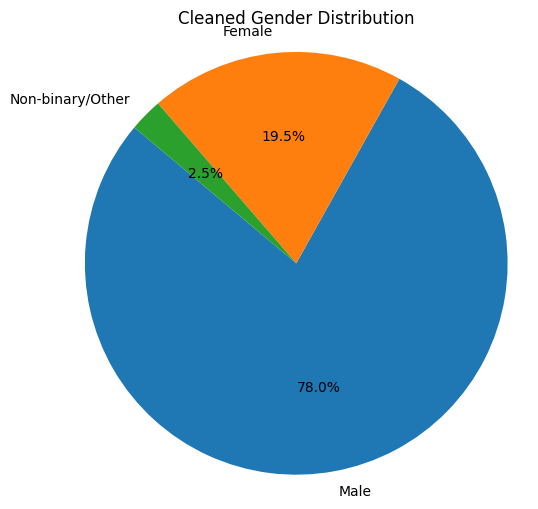

In [5]:
# no. of respondies grouped by gender:
def cleangender(g):
    g = str(g).strip().lower()
    if g in ['male', 'm', 'man', 'cis male', 'male-ish', 'malr', 'maile']:
        return 'Male'
    elif g in ['female', 'f', 'woman', 'cis female', 'femake', 'female (cis)']:
        return 'Female'
    else:
        return 'Non-binary/Other'

survey['GenderCleaned'] = survey['Gender'].apply(cleangender)

gendercounts = survey['GenderCleaned'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gendercounts, labels=gendercounts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cleaned Gender Distribution')
plt.axis('equal')
plt.show()

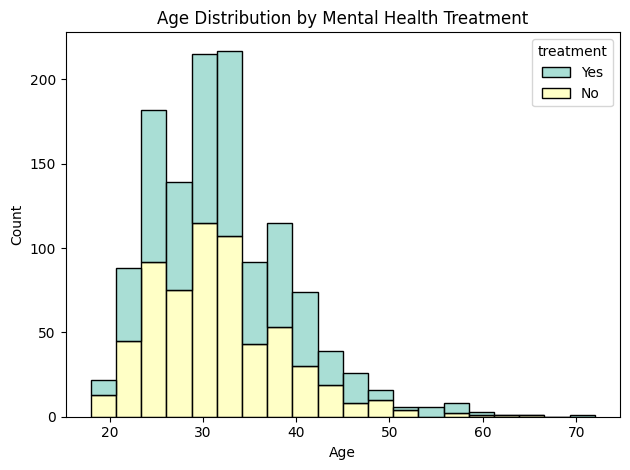

In [21]:
# No of age distribution by treatment
sns.histplot(data=df, x='Age', hue='treatment', bins=20, multiple='stack', palette='Set3')
plt.title("Age Distribution by Mental Health Treatment")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

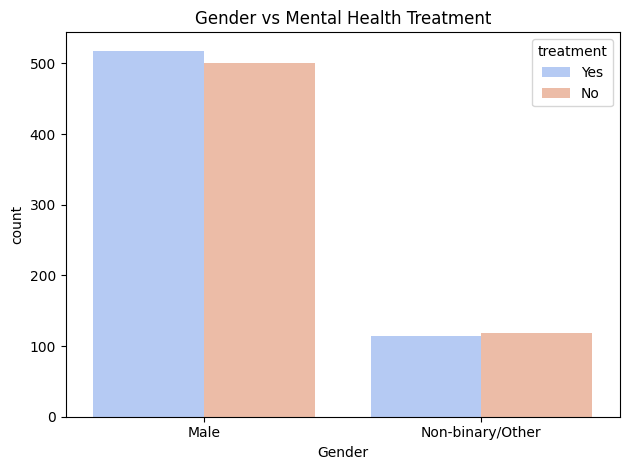

In [19]:
# group of genders taken treatment:
sns.countplot(data=df, x='Gender', hue='treatment', palette='coolwarm')
plt.title("Gender vs Mental Health Treatment")
plt.tight_layout()
plt.show()

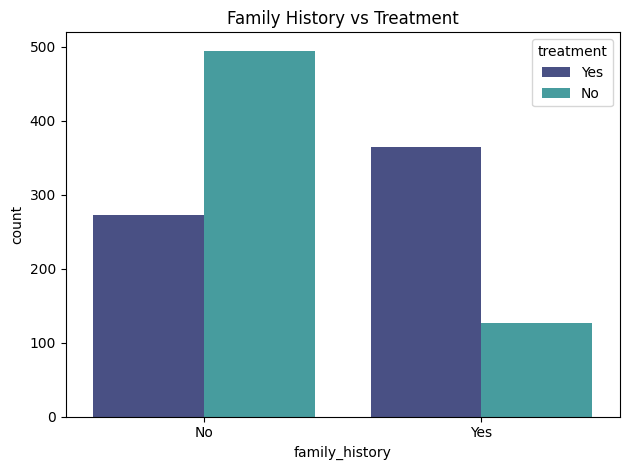

In [17]:
#Treatments taken by number of family:
sns.countplot(data=survey, x='family_history', hue='treatment', palette='mako')
plt.title("Family History vs Treatment")
plt.tight_layout()
plt.show()


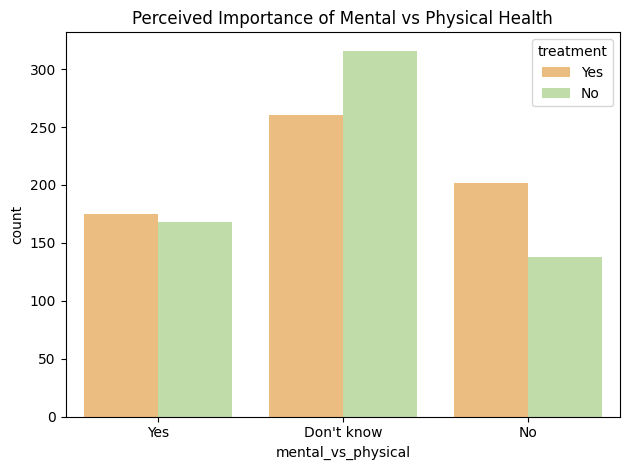

In [23]:
# perception of mental and physical health
sns.countplot(data=survey, x='mental_vs_physical', hue='treatment', palette='Spectral')
plt.title("Perceived Importance of Mental vs Physical Health")
plt.tight_layout()
plt.show()

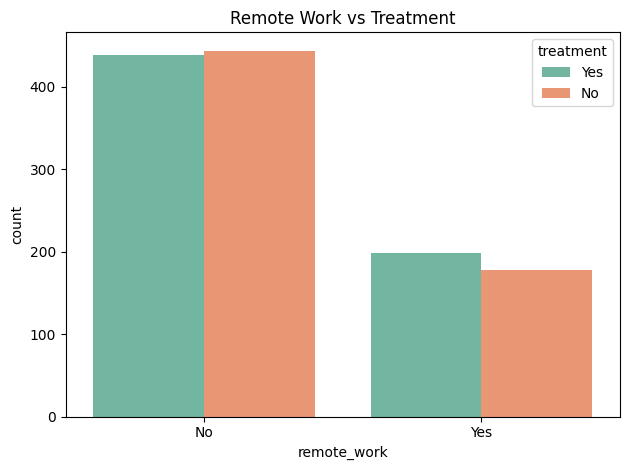

In [16]:
# no. of people working in corporate who are taking treatment
sns.countplot(data=survey, x='remote_work', hue='treatment', palette='Set2')
plt.title("Remote Work vs Treatment")
plt.tight_layout()
plt.show()


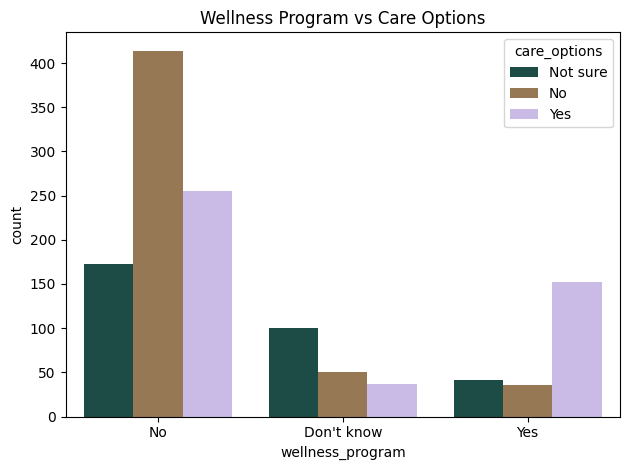

In [14]:
#Distribution of Wellness programs and care options
sns.countplot(data=survey, x='wellness_program', hue='care_options', palette='cubehelix')
plt.title("Wellness Program vs Care Options")
plt.tight_layout()
plt.show()

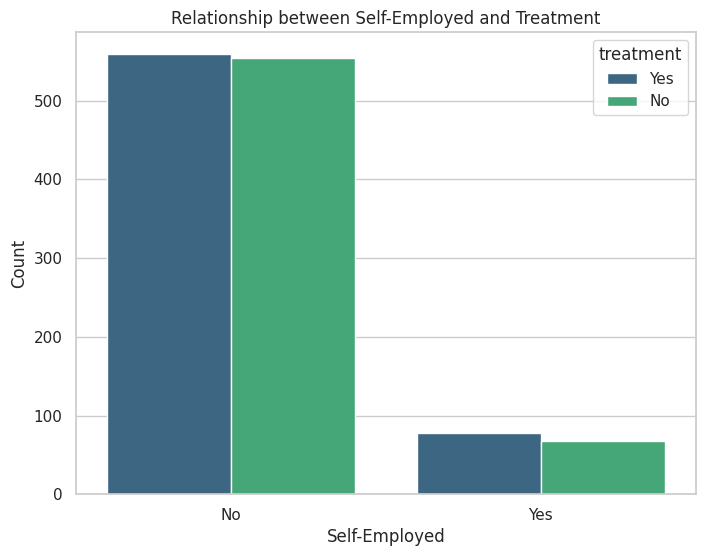

In [ ]:
# to explore the relation between self employed and the treatment-
plt.figure(figsize=(8,6))
sns.countplot(data=survey, x='self_employed', hue='treatment', palette='viridis')
plt.title('Relationship between Self-Employed and Treatment')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()


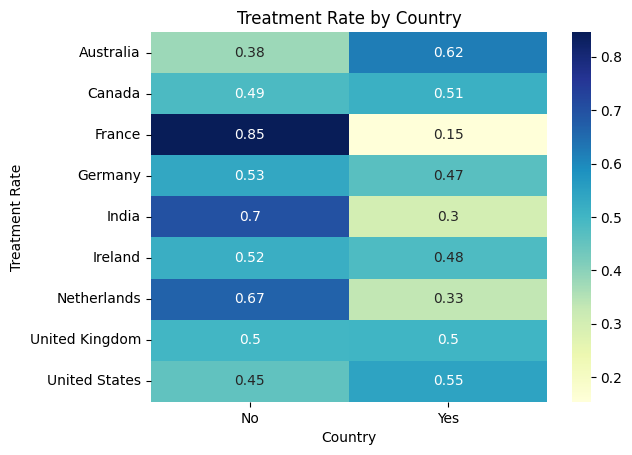

In [ ]:
#Top 10 countries who has received treatment using heatmap
countrycount=survey['Country'].value_counts()
actualcountry=countrycount[countrycount >=10].index
data=survey[survey['Country'].isin(actualcountry)].groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0)
sns.heatmap(data, annot=True, cmap='YlGnBu')
plt.title('Treatment Rate by Country')
plt.xlabel('Country')
plt.ylabel('Treatment Rate')
plt.show()

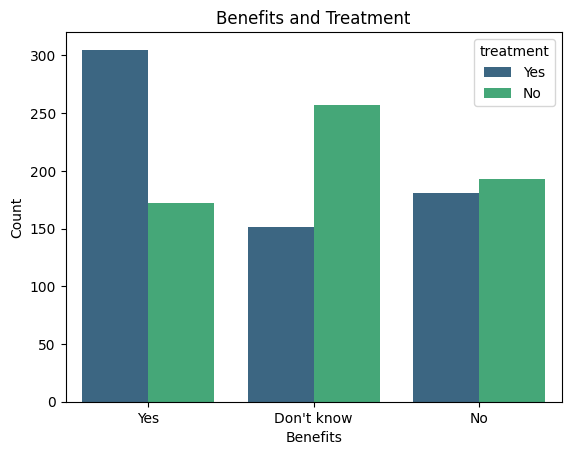

In [ ]:
 #Attitudes towards mental health in the workspace taking benefits and treatment:
sns.countplot(data=survey, x='benefits', hue='treatment', palette='viridis')
plt.title('Benefits and Treatment')
plt.xlabel('Benefits')
plt.ylabel('Count')
plt.show()


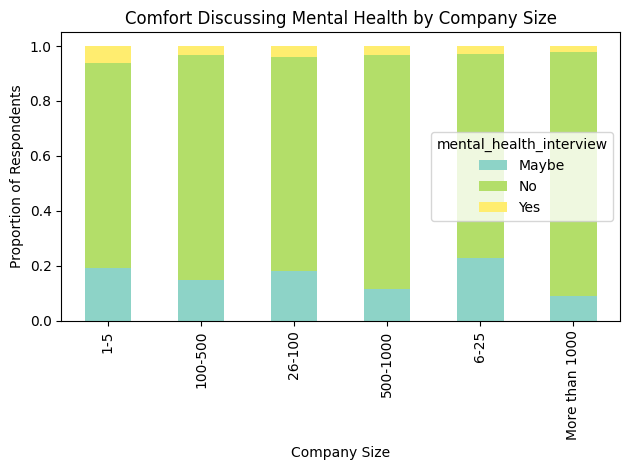

In [ ]:
#company size and comfort discussing mental health using bar chart:
temp = survey[survey['mental_health_interview'] != 'Unknown']
tab = pd.crosstab(temp['no_employees'], temp['mental_health_interview'], normalize='index')

tab.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Comfort Discussing Mental Health by Company Size")
plt.ylabel("Respondents ")
plt.xlabel("Company Size")
plt.tight_layout()
plt.show()



/tmp/ipython-input-5-1111710731.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=survey, x='Gender', palette='Set2')


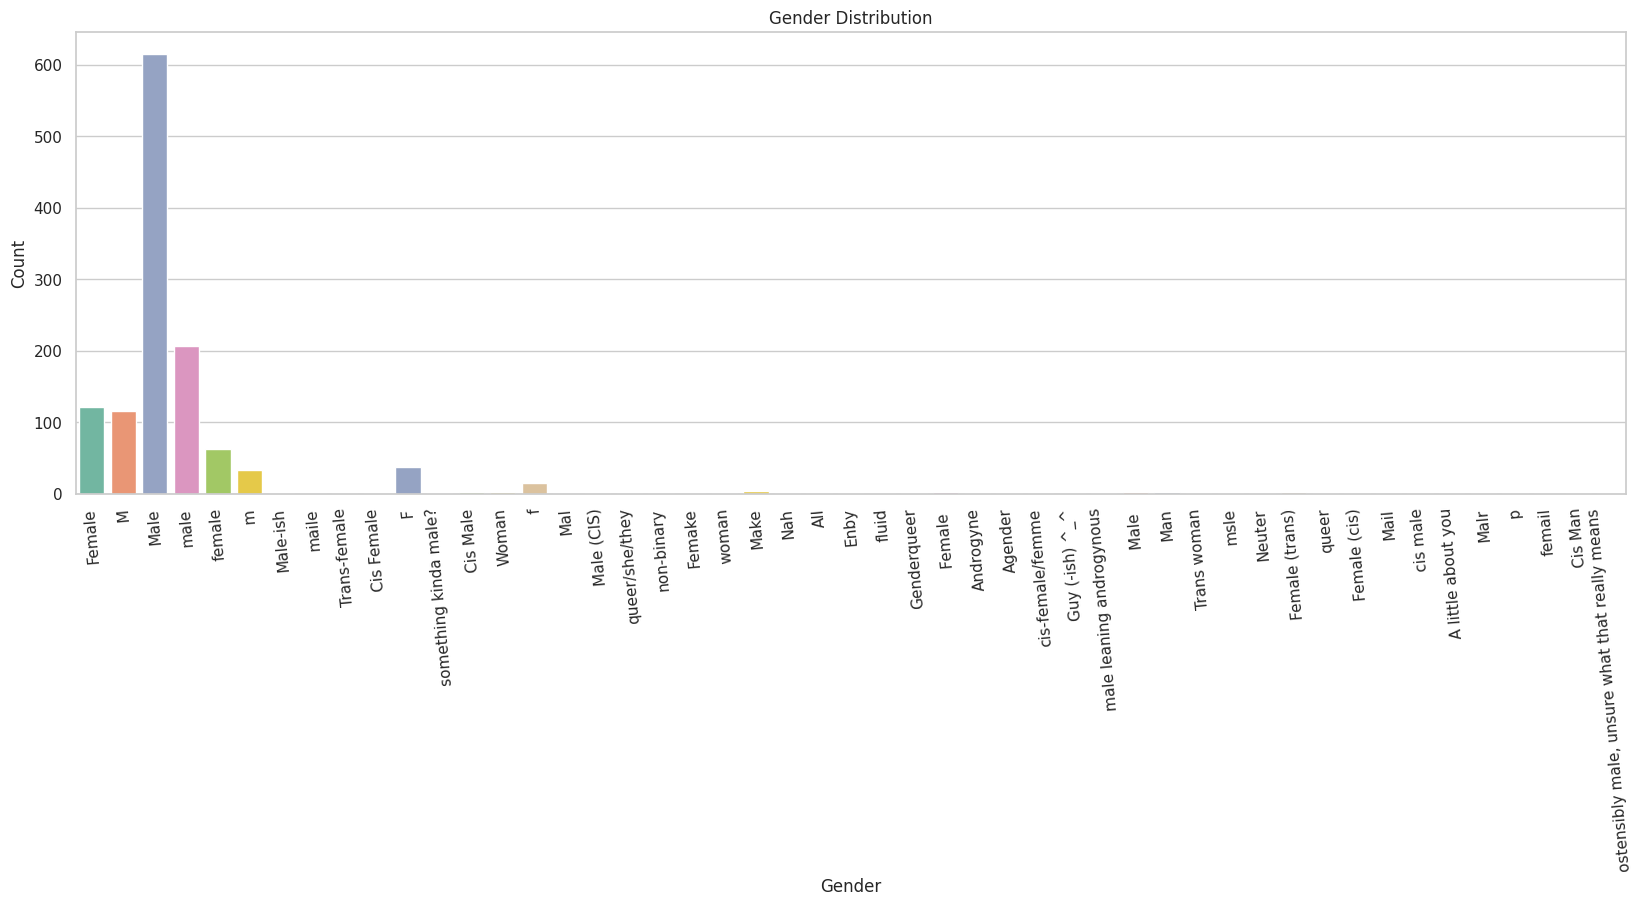

In [ ]:
#Visualizations: barchart for gender distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.countplot(data=survey, x='Gender', palette='Set2')
plt.title("Gender Distribution")
plt.xticks(rotation=95)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


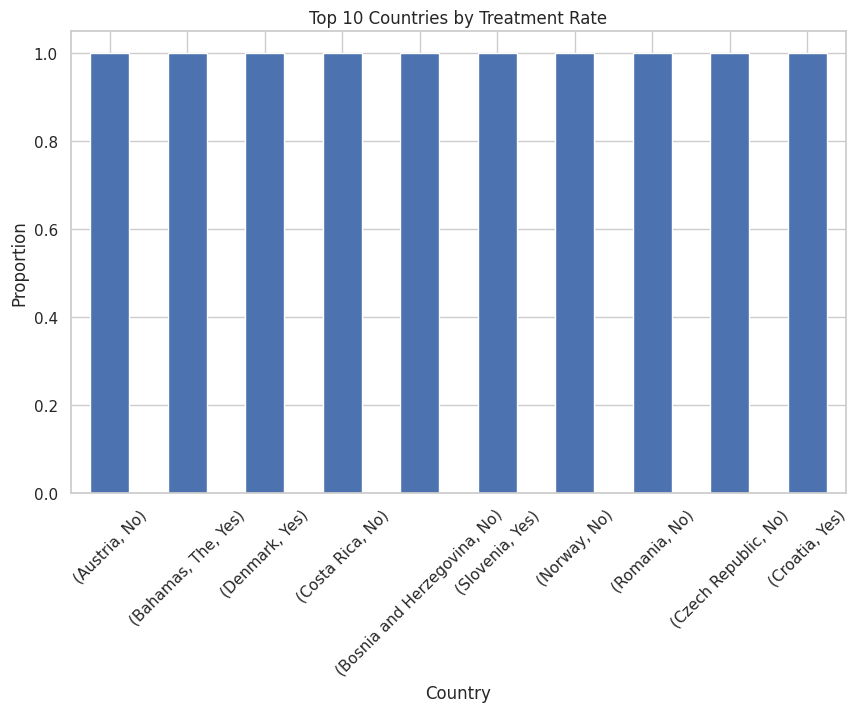

In [ ]:
#top 10 countries by treatment rate
treatment=survey.groupby("Country")['treatment'].value_counts(normalize=True)
topcountries=treatment.sort_values( ascending=False).head(10)

topcountries.loc[:].plot(kind=  'bar', figsize=(10,6))
plt.title('Top 10 Countries by Treatment Rate')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Hypothesis testing: one sample t-test to test the avg age is different from mean population 30
import pandas as pd
from scipy import stats
populationmean=30
t_stat, p_value=stats.ttest_1samp(survey['Age'], populationmean)
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha=0.05
if p_value<alpha:
  print("Reject the null hypothesis- The average is significantly different from the mean 30")
else:
  print("Fail to reject the null hypothesis- There is no significant difference from mean 30")

t-statistic: 1.0000000098578297
p-value: 0.31750281043263767
Fail to reject the null hypothesis- There is no significant difference from mean 30


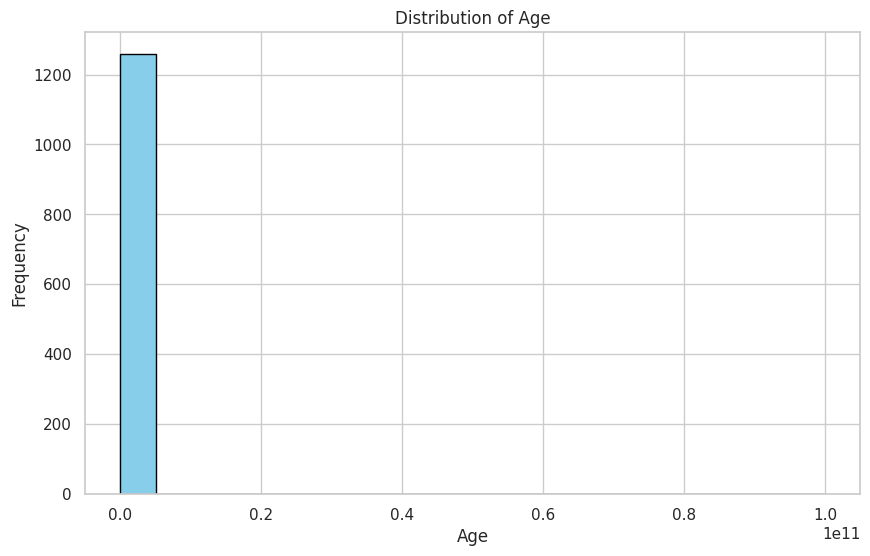

In [ ]:
# Visualization using histogram for distribution of age
plt.figure(figsize=(10, 6))
plt.hist(survey['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

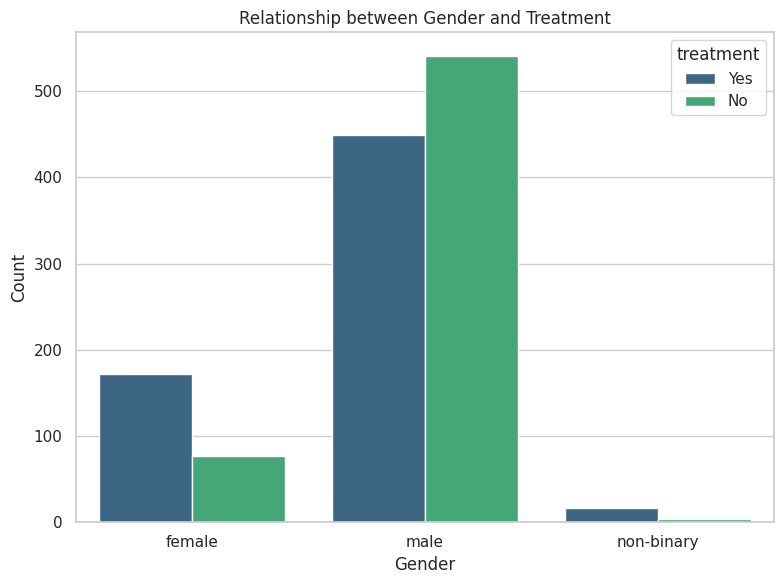

In [ ]:
# visual to know the relationship between gender and treatment
plt.figure(figsize=(8, 6))
sns.countplot(data=survey, x='Gender', hue='treatment', palette='viridis')
plt.title('Relationship between Gender and Treatment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

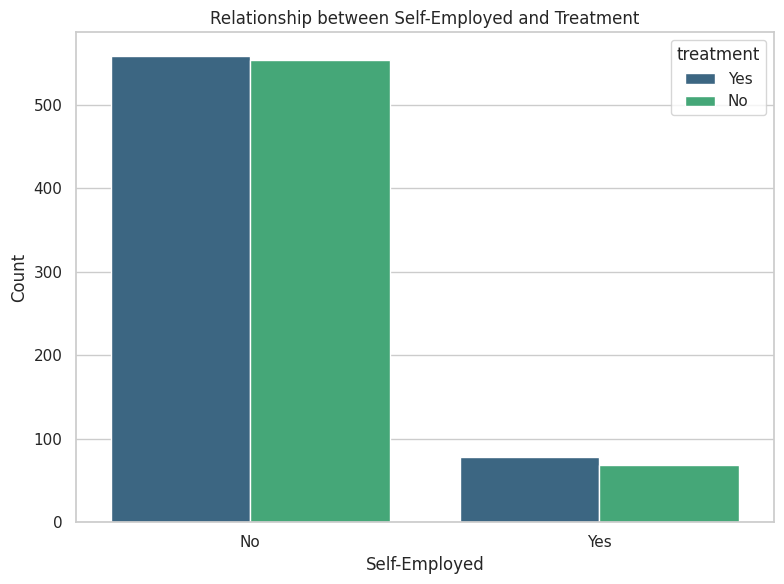

In [ ]:
#visual to check the relation between self employed and treatment
plt.figure(figsize=(8, 6))
sns.countplot(data=survey, x='self_employed', hue='treatment', palette='viridis')
plt.title('Relationship between Self-Employed and Treatment')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

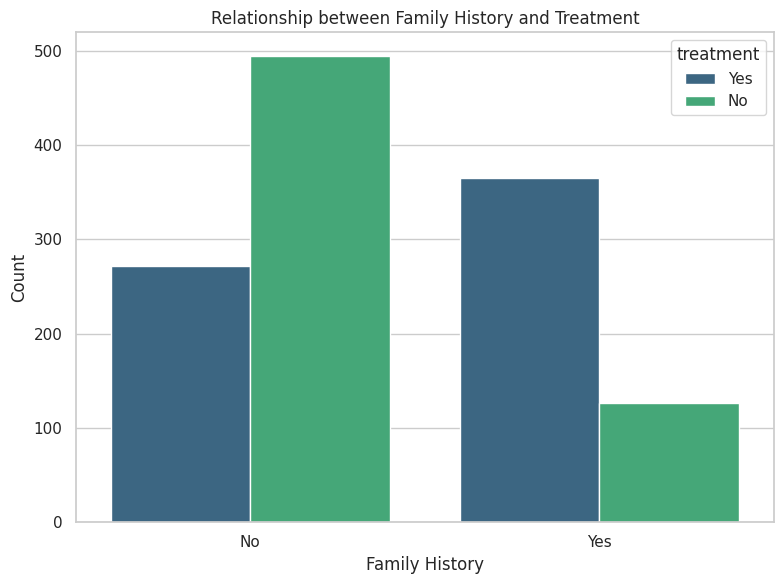

In [ ]:
#to check the count of family history with treatment
plt.figure(figsize=(8, 6))
sns.countplot(data=survey, x='family_history', hue='treatment', palette='viridis')
plt.title('Relationship between Family History and Treatment')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
print(survey.isnull().sum())
print(survey['Gender'].value_counts())
print(survey['self_employed'].value_counts())
print(survey['work_interfere'].value_counts())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64
Gender
Male                                              615
male    

**Reasoning**:
Handle missing values in 'state', 'self_employed', and 'work_interfere' by imputation and drop the 'comments' column due to a high number of missing values. Standardize the 'Gender' column by mapping similar entries to consistent categories.



In [ ]:
# Check if 'comments' column exists before attempting to drop
if 'comments' in survey.columns:
    survey = survey.drop('comments', axis=1)

survey['state'] = survey['state'].fillna(survey['state'].mode()[0])
survey['self_employed'] = survey['self_employed'].fillna(survey['self_employed'].mode()[0])
survey['work_interfere'] = survey['work_interfere'].fillna('Don\'t know')


gender_map = {
    'male': 'male', 'm': 'male', 'make': 'male', 'male ': 'male', 'cis male': 'male', 'mal': 'male', 'maile': 'male', 'male (cis)': 'male', 'cis man': 'male', 'malr': 'male', 'msle': 'male', 'mail': 'male',
    'female': 'female', 'f': 'female', 'woman': 'female', 'femake': 'female', 'female (trans)': 'female', 'cis female': 'female', 'trans-female': 'female', 'femail': 'female', 'cis-female/femme': 'female', 'female (cis)': 'female',
    'female ': 'female', 'cis female ': 'female', 'male-ish': 'non-binary', 'queer/she/they': 'non-binary', 'enby': 'non-binary', 'fluid': 'non-binary', 'genderqueer': 'non-binary', 'androgyne': 'non-binary', 'agender': 'non-binary', 'nah': 'non-binary', 'all': 'non-binary', 'non-binary': 'non-binary', 'male leaning androgynous': 'non-binary', 'guy (-ish) ^_^': 'non-binary', 'trans woman': 'non-binary', 'neuter': 'non-binary', 'queer': 'non-binary', 'a little about you': 'non-binary', 'ostensibly male, unsure what that really means': 'non-binary', 'p': 'non-binary', 'something kinda male?': 'non-binary'
}
survey['Gender'] = survey['Gender'].replace(gender_map)

print(survey.isnull().sum())
print(survey['Gender'].value_counts())

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64
Gender
Male                  615
male                  243
Female                121
M                     116
female                 80
F                      38
non-binary        

In [ ]:
#mapping the gender variation:
gender_mapping_refined = {
    'Male': 'male',
    'Female': 'female',
    'M': 'male',
    'F': 'female',
    'Make': 'male',
    'Woman': 'female',
    'Cis Male': 'male',
    'Man': 'male',
    'Female (trans)': 'female',
    'Male-ish': 'non-binary',
    'Trans-female': 'non-binary',
    'Male (CIS)': 'male',
    'Mal': 'male',
    'Cis Female': 'female',
    'something kinda male?': 'non-binary',
    'maile': 'male',
    'woman': 'female',
    'Femake': 'female',
    'queer/she/they': 'non-binary',
    'Enby': 'non-binary',
    'fluid': 'non-binary',
    'Genderqueer': 'non-binary',
    'Androgyne': 'non-binary',
    'Agender': 'non-binary',
    'Nah': 'non-binary',
    'All': 'non-binary',
    'non-binary': 'non-binary',
    'male leaning androgynous': 'non-binary',
    'Guy (-ish) ^_^': 'non-binary',
    'cis-female/femme': 'female',
    'Trans woman': 'non-binary',
    'msle': 'male',
    'Neuter': 'non-binary',
    'queer': 'non-binary',
    'Female (cis)': 'female',
    'Mail': 'male',
    'cis male': 'male',
    'A little about you': 'non-binary',
    'Malr': 'male',
    'p': 'non-binary',
    'Cis Man': 'male',
    'ostensibly male, unsure what that really means': 'non-binary'
}

survey['Gender'] = survey['Gender'].replace(gender_mapping_refined)
print(survey['Gender'].value_counts())

Gender
male          987
female        247
non-binary     20
Male            3
Female          2
Name: count, dtype: int64


In [ ]:
gender_mapping_further_refined = {
    'Male': 'male',
    'Female': 'female'
}

survey['Gender'] = survey['Gender'].replace(gender_mapping_further_refined)
print(survey['Gender'].value_counts())

Gender
male          987
female        247
non-binary     20
Male            3
Female          2
Name: count, dtype: int64


In [ ]:
gender_mapping_final = {
    'Male': 'male',
    'Female': 'female'
}

survey['Gender'] = survey['Gender'].replace(gender_mapping_final)
print(survey['Gender'].value_counts())
print(survey.isnull().sum())

Gender
male          987
female        247
non-binary     20
Male            3
Female          2
Name: count, dtype: int64
Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [ ]:
gender_mapping_comprehensive = {
    'Male': 'male',
    'Female': 'female',
    'M': 'male',
    'F': 'female',
    'Make': 'male',
    'Woman': 'female',
    'Cis Male': 'male',
    'Man': 'male',
    'Female (trans)': 'female',
    'Male-ish': 'non-binary',
    'Trans-female': 'non-binary',
    'Male (CIS)': 'male',
    'Mal': 'male',
    'Cis Female': 'female',
    'something kinda male?': 'non-binary',
    'maile': 'male',
    'woman': 'female',
    'Femake': 'female',
    'queer/she/they': 'non-binary',
    'Enby': 'non-binary',
    'fluid': 'non-binary',
    'Genderqueer': 'non-binary',
    'Androgyne': 'non-binary',
    'Agender': 'non-binary',
    'Nah': 'non-binary',
    'All': 'non-binary',
    'non-binary': 'non-binary',
    'male leaning androgynous': 'non-binary',
    'Guy (-ish) ^_^': 'non-binary',
    'cis-female/femme': 'female',
    'Trans woman': 'non-binary',
    'msle': 'male',
    'Neuter': 'non-binary',
    'queer': 'non-binary',
    'Female (cis)': 'female',
    'Mail': 'male',
    'cis male': 'male',
    'A little about you': 'non-binary',
    'Malr': 'male',
    'p': 'non-binary',
    'Cis Man': 'male',
    'ostensibly male, unsure what that really means': 'non-binary',
    'male ': 'male',
    'female ': 'female',
    'cis female ': 'female'
}

survey['Gender'] = survey['Gender'].replace(gender_mapping_comprehensive)
print(survey['Gender'].value_counts())
print(survey.isnull().sum())

Gender
male          987
female        247
non-binary     20
Male            3
Female          2
Name: count, dtype: int64
Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [ ]:
survey['Gender'] = survey['Gender'].str.lower()

gender_mapping_final = {
    'male': 'male',
    'female': 'female',
    'm': 'male',
    'f': 'female',
    'make': 'male',
    'woman': 'female',
    'cis male': 'male',
    'man': 'male',
    'female (trans)': 'female',
    'male-ish': 'non-binary',
    'trans-female': 'non-binary',
    'male (cis)': 'male',
    'mal': 'male',
    'cis female': 'female',
    'something kinda male?': 'non-binary',
    'maile': 'male',
    'femake': 'female',
    'queer/she/they': 'non-binary',
    'enby': 'non-binary',
    'fluid': 'non-binary',
    'genderqueer': 'non-binary',
    'androgyne': 'non-binary',
    'agender': 'non-binary',
    'nah': 'non-binary',
    'all': 'non-binary',
    'non-binary': 'non-binary',
    'male leaning androgynous': 'non-binary',
    'guy (-ish) ^_^': 'non-binary',
    'cis-female/femme': 'female',
    'trans woman': 'non-binary',
    'msle': 'male',
    'neuter': 'non-binary',
    'queer': 'non-binary',
    'female (cis)': 'female',
    'mail': 'male',
    'p': 'non-binary',
    'cis man': 'male',
    'ostensibly male, unsure what that really means': 'non-binary',
    'malr': 'male'
}

survey['Gender'] = survey['Gender'].replace(gender_mapping_final)

print(survey['Gender'].value_counts())
print(survey.isnull().sum())

Gender
male          987
female        247
non-binary     20
male            3
female          2
Name: count, dtype: int64
Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


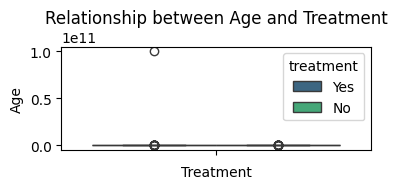

In [4]:

plt.figure(figsize=(4, 2))
sns.boxplot(data=survey, hue='treatment', y='Age', palette='viridis')
plt.title('Relationship between Age and Treatment')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

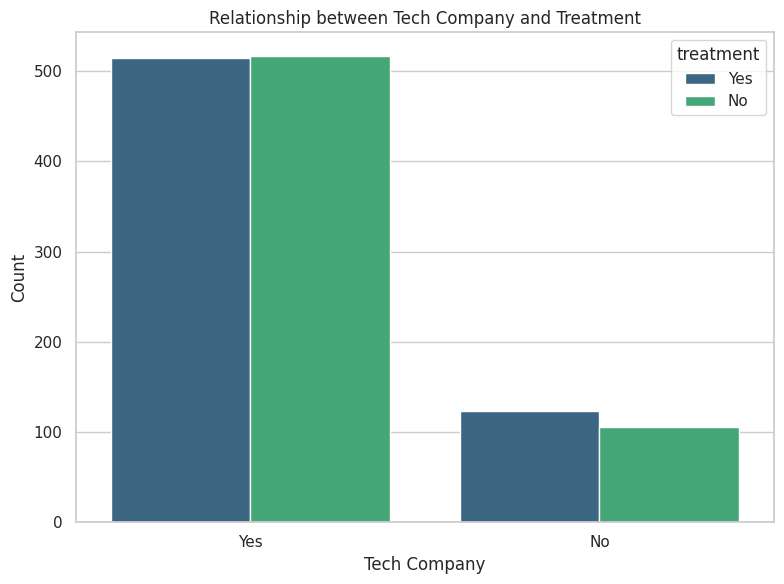

In [ ]:
# to get the count of tech co with treatment
plt.figure(figsize=(8, 6))
sns.countplot(data=survey, x='tech_company', hue='treatment', palette='viridis')
plt.title('Relationship between Tech Company and Treatment')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
print(survey['Country'].value_counts())
print(survey['state'].value_counts())

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay                     1
Sp

In [ ]:
import plotly.express as px

country_treatment_rate = survey.groupby('Country')['treatment'].apply(lambda x: (x == 'Yes').sum() / len(x)).reset_index()
country_treatment_rate = country_treatment_rate.rename(columns={'treatment': 'treatment_rate'})

fig = px.choropleth(country_treatment_rate,
                    locations="Country",
                    locationmode='country names',
                    color="treatment_rate",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Mental Health Treatment Rate by Country")
fig.show()

In [ ]:
us_survey = survey[survey['Country'] == 'United States']
state_treatment_rate = us_survey.groupby('state')['treatment'].apply(lambda x: (x == 'Yes').sum() / len(x)).reset_index()
state_treatment_rate = state_treatment_rate.rename(columns={'treatment': 'treatment_rate'})

fig = px.choropleth(state_treatment_rate,
                    locations='state',
                    locationmode='USA-states',
                    scope='usa',
                    color='treatment_rate',
                    color_continuous_scale="Viridis",
                    hover_name='state',
                    title='Mental Health Treatment Rate by State (USA)')
fig.show()

In [ ]:
numerical_cols = survey[['Age']]
correlation_matrix = numerical_cols.corr()
display(correlation_matrix)

,Age
Age,1.0


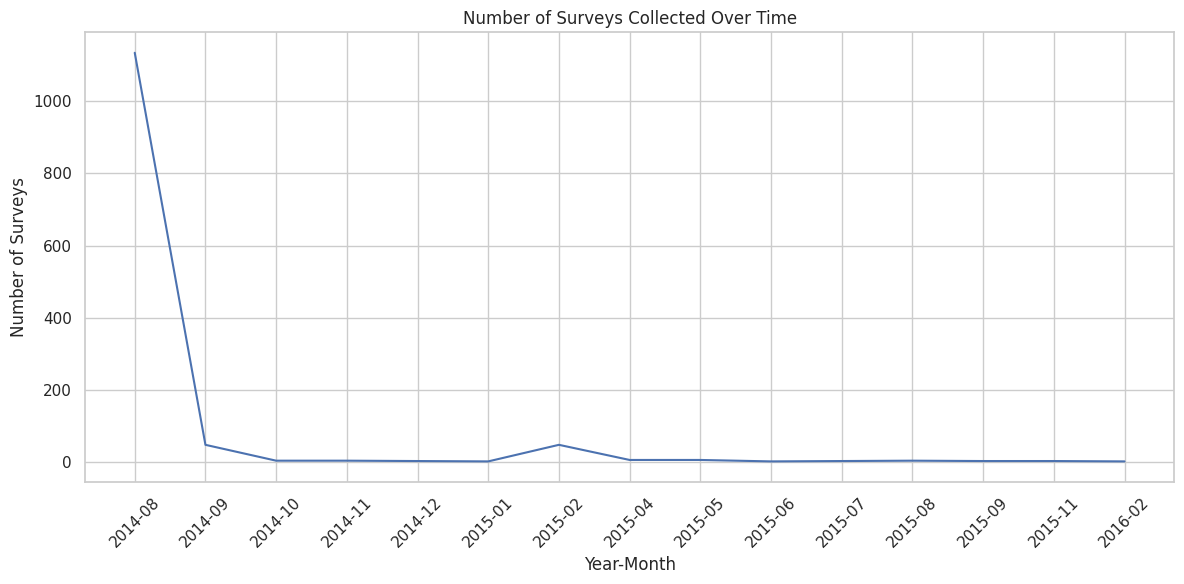

In [ ]:
survey['Timestamp'] = pd.to_datetime(survey['Timestamp'])
survey['YearMonth'] = survey['Timestamp'].dt.to_period('M')
surveys_over_time = survey.groupby('YearMonth').size().reset_index(name='count')
surveys_over_time['YearMonth'] = surveys_over_time['YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=surveys_over_time, x='YearMonth', y='count')
plt.title('Number of Surveys Collected Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Surveys')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()